In [72]:
import numpy as np
import math

from mandelbrot import mandelbrot_generator


def get_escape_time(c: complex, max_iterations: int) -> int | None:
    """Returns the escape time of a mandelbrot sequence with initial term c

    Parameters:
        c [complex]: the initial term
        max_iterations [int]: the maximum number of iterations

    Returns:
        int: the number of iterations within max_iterations for |z_n| > 2
        None: if |z_n| <= 2 for n = max_iterations

    """
    z = c
    for i in range(max_iterations + 1):
        if abs(z) > 2:
            return i
        z = z ** 2 + c
    return None


print(get_escape_time(2+1j, 5))
print(get_escape_time(1+1j, 10))
print(get_escape_time(0.5+0.5j, 3))
print(get_escape_time(0.5+0.5j, 4))
print(get_escape_time(0.38+0.25j, 100))

0
1
None
4
56


In [84]:
def get_complex_grid(top_left = complex, bottom_right = complex, step = float) -> np.ndarray:
    """ Returns a grid of complex numbers with start point top_left, end point bottom_right and increases by step"

    Parameters:
        top_left [complex]:
            the start point
        bottom_right [complex]:
            the end point, not included in grid bottom_right.real must be greater than top_left.real
        step:
            moving one column right increases top_left.real by step
            moving one row down decreases top_left.imag by step

    Returns:
        np.ndarray [complex]:
            the grid of complex numbers

    """


    x1 = top_left.real           #variable assignments
    x2 = bottom_right.real
    y1 = top_left.imag
    y2 = bottom_right.imag

    if x1 > x2:
        raise ValueError('The real part of bottom right must be greater than the real part of top left')

    m = math.floor((x2 - x1)/ step)
    n = math.floor((y1 - y2) / step)
    array = np.zeros((n+1, m+1), dtype = complex)
    array[:,:] = top_left       #assign every entry to top_left

    imag_vect = np.arange(n + 1).reshape(n + 1,1)
    imag_vect = imag_vect * step
    imag_vect = imag_vect * (0 - 1j)
    real_vect = np.arange(n + 1, dtype = complex) * step #broadcasting

    grid_step = real_vect + imag_vect #broadcasting
    return array + grid_step






In [85]:
get_complex_grid(-1+1j, 1.1-1.1j, 0.25)

TypeError: 'float' object cannot be interpreted as an integer

In [81]:
def get_escape_time_color_arr(c_arr: np.ndarray, max_iterations: int) -> np.ndarray:
    """Returns a grid of escape times of points in the complex plane under the mandelbrot sequence running at max_iterations.

    Parameters:
        c_arr [np.ndarray]:
            a complex np.array
        max_iterations [int]:
            the maximum number of iterations.

    Returns:
        np.ndarray:
            a grid of escape times calculated according to the rule (max_iterations - escape_time + 1) / (max_iterations + 1)

    """

    canvas = np.zeros(c_arr.shape, dtype = float)
    x , y = c_arr.shape
    for i in range(x):
        for j in range(y):
            if get_escape_time(complex(c_arr[i,j]), max_iterations) is None:
                canvas[i,j] = 0
            else: canvas[i,j] = (max_iterations - get_escape_time(complex(c_arr[i,j]), max_iterations) + 1) / (max_iterations +1)



    return canvas








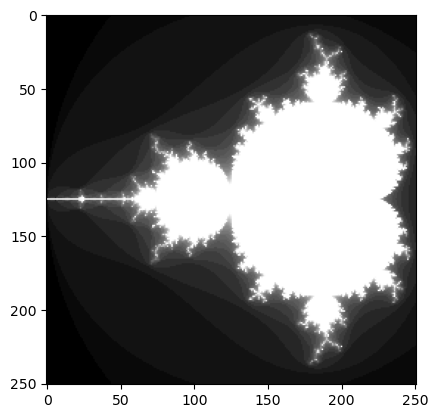

In [83]:
from matplotlib import pyplot as plt

grid = get_complex_grid(-2+1.25j, 0.5-1.25j, 0.01)
colors = get_escape_time_color_arr(grid, 30)

plt.imshow(colors, cmap="Greys")
